# Importing Required Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Creating Dataset

In [6]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0] 
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


# Standardizing The Data

In [8]:
X = df.drop('Gender', axis=1)
y = df['Gender']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print (X_scaled)

[[ 0.18419807  0.13867505  0.50910379]
 [-0.52425605 -0.69337525 -0.59764358]
 [ 1.60110632  1.52542554  1.61585117]
 [ 0.8926522   0.5547002   0.06640484]
 [-1.23271018 -1.24807544 -1.26169201]
 [ 0.46757972  0.83205029  0.95180275]
 [-0.09918358 -0.2773501  -0.15494463]
 [ 1.17603385  1.38675049  1.17315222]
 [-0.94932853 -0.83205029 -0.81899306]
 [-1.51609183 -1.38675049 -1.48304149]]


# Applying PCA algorithm

In [13]:
pca = PCA(n_components=2)
print(pca)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


PCA(n_components=2)
[0 0 1]


# Evaluating confusion matrix

[[2 0]
 [0 1]]


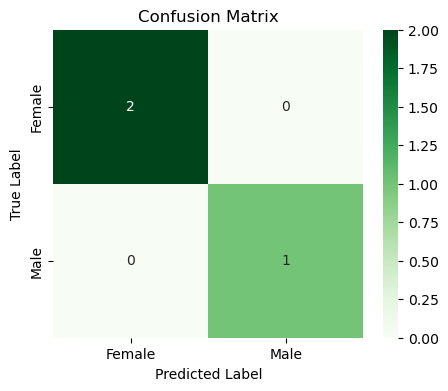

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Interpretation 
The confusion matrix tells us how well the model predicted gender compared to the actual labels:
Top-left (2) → Two females were correctly predicted as female (true positives for Female).
Top-right (0) → No females were incorrectly predicted as male (false negatives for Female).
Bottom-left (0) → No males were incorrectly predicted as female (false positives for Female).
Bottom-right (1) → One male was correctly predicted as male (true positives for Male).

The confusion matrix indicates that the model delivered perfect classification for this dataset, accurately predicting every instance without error. It correctly identified both Female cases (2 true positives) and the single Male case (1 true negative), with zero false positives or false negatives. This complete accuracy in distinguishing between the two classes resulted in 100% accuracy, precision, and recall for both, showcasing flawless performance on the available data.

# Visualizing PCA Result

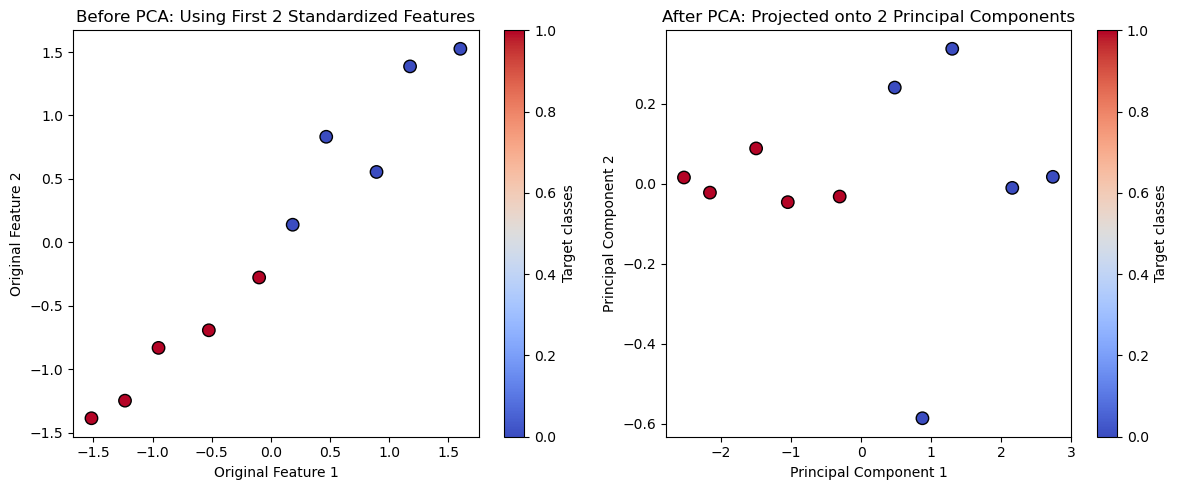

In [18]:
y_numeric = pd.factorize(y)[0]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')
plt.tight_layout()
plt.show()

## Interpretation
### Left plot before PCA
This shows the original standardized data plotted using the first two features. As these are raw input dimensions, there is no guarantee of clear separation between classes.
### Right plot after PCA
This displays the transformed data using the top 2 principal components. These new components capture the maximum variance often showing better class separation and structure making it easier to analyze or model.